### Task 1

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random

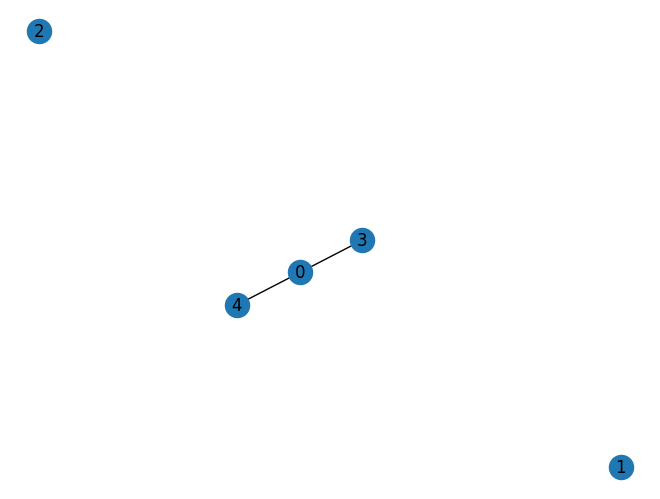

[(0, 3), (0, 4)]
Test passed successfully!


In [3]:
def generate_ER_graph(n, p):
    G = nx.erdos_renyi_graph(n,p)
    nx.draw(G, with_labels = True)
    plt.show()
    return G

def create_ER_graph(n, p):
    G = nx.erdos_renyi_graph(n,p)
    return G

def test_er_graph(G, n, p):
    # Test if the number of nodes matches
    assert G.number_of_nodes() == n

    # Test if the edge probability is close to the expected value
    calculated_p = G.number_of_edges() / (n * (n - 1) / 2)
    assert abs(calculated_p - p) < 0.30  # Tolerance

    print("Test passed successfully!")

# Example usage:
n = 5
p = 0.4
G = generate_ER_graph(n,p)
print(G.edges())

# Example test:
test_er_graph(G, n, p)




In [48]:
# Setting up variables
tries = 10000
n = 5
p = 0.4
edges_repetitions = []
frequency = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

# Based on p = 0.4 and n = 5, then n' = n - 1 => n' = 4. The Binomial probability of edges for each node would be: 
binomial_p = {
    0: 0.1296,
    1: 0.3456,
    2: 0.3456,
    3: 0.1536,
    4: 0.0256
}

# Running the tries
for i in range(0,tries):
    G = create_ER_graph(n,p)
    for node in G.nodes():
        edges_repetitions.append(len(G.edges(node)))


# Count the number of edges for each node.
for node in range(0,n):
    reps = Counter(edges_repetitions)[node]
    frequency[node] = reps
    print(node, "-----" , reps, "-----" ,reps/(tries * n),"-----" ,reps/(tries * n) - binomial_p[node])






0 ----- 6494 ----- 0.12988 ----- 0.00028000000000000247
1 ----- 17184 ----- 0.34368 ----- -0.0019200000000000328
2 ----- 17430 ----- 0.3486 ----- 0.0030000000000000027
3 ----- 7660 ----- 0.1532 ----- -0.0003999999999999837
4 ----- 1232 ----- 0.02464 ----- -0.0009600000000000025


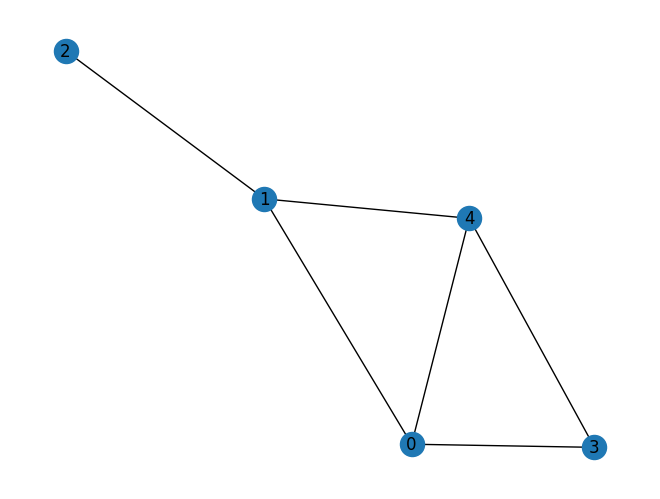

In [54]:
generate_ER_graph(n,p)

### Task 2

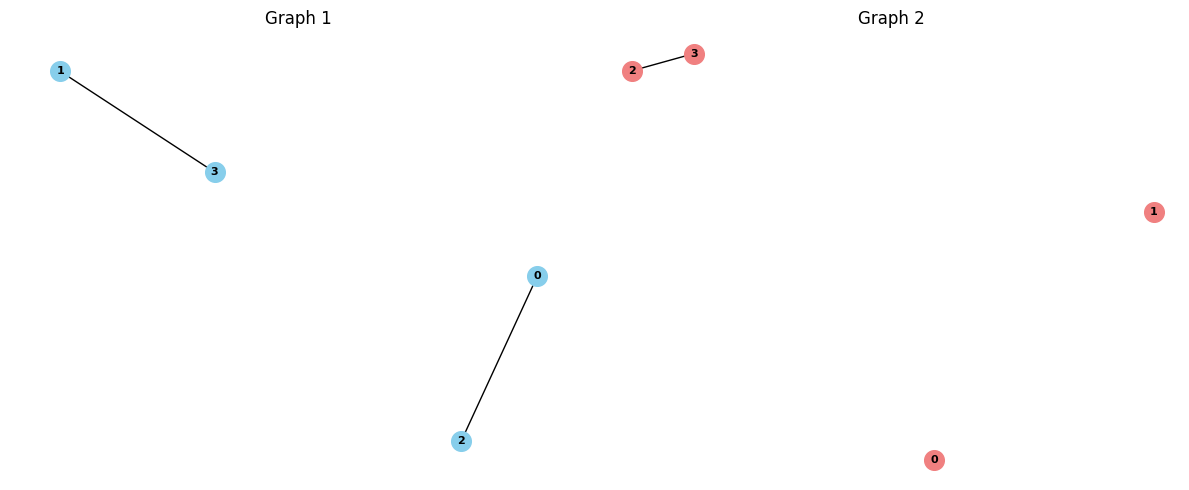

In [76]:
def generate_correlated_er_graphs(n, p00, p01, p10, p11):
    if p00 + p10 + p01 + p11 != 1.0:
        raise ValueError("Probabilities must sum up to 1")
        
    # Generate two ER graphs with n vertices
    g1 = nx.erdos_renyi_graph(n, p00)
    g2 = nx.erdos_renyi_graph(n, p00)

    # Iterate through all edges and modify them based on correlation parameters
    for i in range(n):
        for j in range(i + 1, n):
            # Randomly decide the correlation between edges
            r = np.random.rand()
            if r < p01:
                # Edge in G1, no edge in G2
                g1.add_edge(i, j)
            elif r < p01 + p10:
                # Edge in G2, no edge in G1
                g2.add_edge(i, j)
            elif r < p01 + p10 + p11:
                # Edge in both G1 and G2
                g1.add_edge(i, j)
                g2.add_edge(i, j)

    return g1, g2
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.title("Graph 1")
    nx.draw(G1, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
    plt.subplot(122)
    plt.title("Graph 2")
    nx.draw(G2, with_labels=True, node_size=200, node_color='lightcoral', font_size=8, font_color='black', font_weight='bold')
    plt.tight_layout()
    plt.show()

    return G1, G2

# Execute

n = 4
p00 = 0.1
p10 = 0.2
p01 = 0.3
p11 = 0.4

G1, G2 = generate_correlated_er_graphs(n,p00,p10,p01,p11)




In [77]:
# Get all possible pairs of vertices that could form edges
all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]
# Display the result
print("All possible pairs of vertices that could form edges:")
for vertex_pair in all_vertex_pairs:
    print(vertex_pair)

# Possibilities based on the p input and their frequencies:
possibilities = {
    (0,0): 0,
    (0,1): 0,
    (1,0): 0,
    (1,1): 0
}



All possible pairs of vertices that could form edges:
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [78]:
print(G1.edges())
print(G2.edges())

for e1 in G1.edges():
    if e1 in G2.edges():
        possibilities[(1,1)] += 1
    else:
        possibilities[(1,0)] += 1
for e2 in G2.edges():
    # I do not check if e2 in G1 because I already did it in the previous check.
    if e2 not in G1.edges():
        possibilities[(0,1)] += 1
for vertex_pair in all_vertex_pairs:
    if vertex_pair not in G1.edges() and vertex_pair not in G2.edges():
        possibilities[(0,0)] += 1



[(0, 2), (1, 3)]
[(2, 3)]


In [79]:
for k, v in possibilities.items():
    print(k,v/6)

(0, 0) 0.5
(0, 1) 0.16666666666666666
(1, 0) 0.3333333333333333
(1, 1) 0.0
